In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

In [6]:
# 1. Load IMDB dataset (preprocessed)

vocab_size = 10000   # Only top 10k words
max_len = 200        # Max review length

In [10]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [11]:
# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [12]:
# 2. Build the Model (Choose LSTM or GRU)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Change between LSTM or GRU here
model.add(LSTM(128, return_sequences=False))   # For LSTM
# model.add(GRU(128, return_sequences=False))  # For GRU

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# 3. Compile the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# 4. Train the Model

history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 219s 554ms/step - accuracy: 0.6791 - loss: 0.5663 - val_accuracy: 0.8466 - val_loss: 0.3666
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 249s 638ms/step - accuracy: 0.8797 - loss: 0.2940 - val_accuracy: 0.8678 - val_loss: 0.3226
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 266s 647ms/step - accuracy: 0.9239 - loss: 0.2037 - val_accuracy: 0.8674 - val_loss: 0.3290


In [16]:
# 5. Evaluate the Model

loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.8628 - loss: 0.3353

Test Accuracy: 86.74%


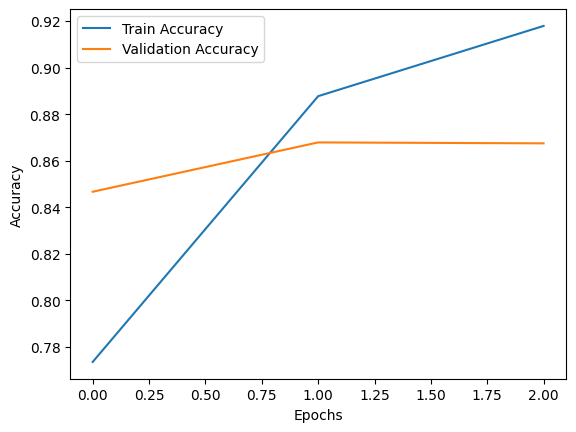

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
